In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import warnings

In [2]:
fact=pd.read_csv('C:\\Users\\user\\ashish\\project1\\movie_data.csv',na_values=['Gross Unkown'])

In [3]:
# PROBLEM
#Read and analyze the imdb movie dataset and create a model to predict the success or failure of a movie.

# Data Cleaning

In [4]:
file=fact.copy()

In [5]:
file.head(1)

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,NaN,Action,"Adventure, Drama"


In [6]:
file['Total_Gross'].value_counts()
#this Clearly shows that there is no null data present in the data

Total_Gross
$0.01M      25
$0.04M      22
$0.02M      22
$0.03M      21
$0.05M      18
            ..
$309.13M     1
$13.28M      1
$159.23M     1
$60.65M      1
$12.14M      1
Name: count, Length: 3500, dtype: int64

In [7]:
file.isnull().sum()

Movie_Title        0
Year               0
Director           0
Actors             0
Rating             0
Runtime(Mins)      0
Censor             0
Total_Gross      861
main_genre         0
side_genre         0
dtype: int64

In [8]:
#Editing the "Total_Gross" column which contains $ and M in its values
def splitg(row):
    val=row['Total_Gross']
    if type(val)==str:
        val=val.replace('$','').replace('M','')
        row['Total_Gross']=float(val)
    #print(row['Total_Gross'])
    return row   
file=file.apply(splitg,axis=1)
#file['Total_Gross']
#print(df)

In [9]:
file.isnull().sum()

Movie_Title        0
Year               0
Director           0
Actors             0
Rating             0
Runtime(Mins)      0
Censor             0
Total_Gross      861
main_genre         0
side_genre         0
dtype: int64

In [10]:
file=file.apply(lambda x:x.fillna(x.median()) \
           if x.dtype=='float' else\
           x.fillna(x.value_counts().index[0]))

In [11]:
file.head(3)

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,30.98,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534.86,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377.85,Action,"Adventure, Drama"


In [12]:
file['Review']=0

In [13]:
def review(row):
    rate=row['Rating']
    view=''
    if rate>9.0:
        view='Perfect'
    elif rate>8.0 and rate< 9.0:
        view='Very Good'
    elif rate>7.0 and rate<8.0:
        view='Good'
    elif rate>6.0 and rate< 7.0:
        view='Average'
    elif rate>3.0 and rate< 6.0:
        view='Poor' 
    else:
        view='Terrible'
    row['Review']=view
    return view
file['Review']=file.apply(review,axis=1)

In [14]:
file

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre,Review
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,30.98,Action,"Adventure, Drama",Perfect
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534.86,Action,"Crime, Drama",Terrible
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377.85,Action,"Adventure, Drama",Terrible
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292.58,Action,"Adventure, Sci-Fi",Very Good
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342.55,Action,"Adventure, Drama",Very Good
...,...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,14.19,Comedy,Sci-Fi,Terrible
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,0.03,Comedy,Romance,Terrible
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,4.92,Comedy,"Musical, Romance",Terrible
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,9.11,Comedy,"Family, Sci-Fi",Terrible


# Information

In [15]:
# THis is a classification problem

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 15)
file.describe()

,Year,Rating,Runtime(Mins),Total_Gross
count,5562.00,5562.00,5562.00,5562.00
mean,2002.79,6.76,112.23,49.96
std,16.14,0.94,21.61,69.27
min,1920.00,1.00,45.00,0.00
25%,1997.00,6.20,97.00,10.71
50%,2007.00,6.80,108.00,30.98
75%,2014.00,7.40,123.00,58.02
max,2022.00,9.30,321.00,936.66


In [17]:
file.describe(include='O')

,Movie_Title,Director,Actors,Censor,main_genre,side_genre,Review
count,5562,5562,5562,5562,5562,5562,5562
unique,5453,2320,5511,25,13,144,6
top,Robin Hood,Woody Allen,"William Shatner, Leonard Nimoy, DeForest Kelle...",UA,Action,"Drama, Romance",Average
freq,3,40,6,1118,1577,324,1968


In [18]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   float64
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
 10  Review         5562 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 478.1+ KB


In [19]:
final=file.copy()

C:\Users\user\AppData\Local\Temp\ipykernel_1992\1915051179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final['Rating'])


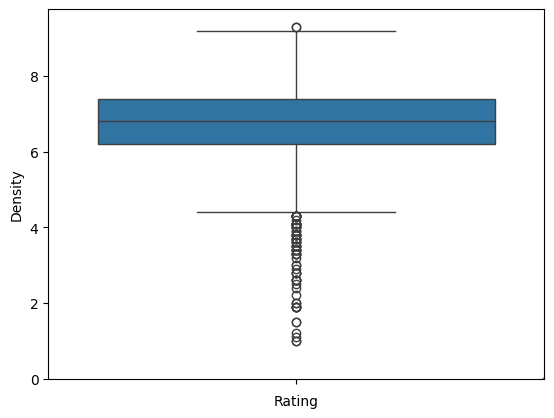

In [20]:
sns.distplot(final['Rating'])
sns.boxplot(final['Rating'])
warnings.filterwarnings('ignore')

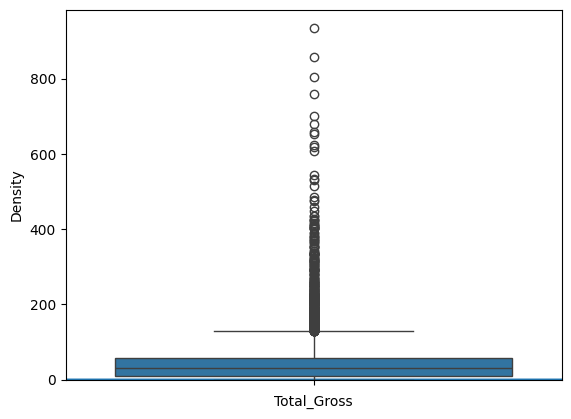

In [21]:
sns.distplot(final['Total_Gross'])
sns.boxplot(final['Total_Gross'])
warnings.filterwarnings('ignore')

In [22]:
file.columns

Index(['Movie_Title', 'Year', 'Director', 'Actors', 'Rating', 'Runtime(Mins)',
       'Censor', 'Total_Gross', 'main_genre', 'side_genre', 'Review'],
      dtype='object')

In [23]:
file

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre,Review
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.30,148,UA,30.98,Action,"Adventure, Drama",Perfect
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.00,152,UA,534.86,Action,"Crime, Drama",Terrible
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.00,201,U,377.85,Action,"Adventure, Drama",Terrible
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.80,148,UA,292.58,Action,"Adventure, Sci-Fi",Very Good
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.80,179,UA,342.55,Action,"Adventure, Drama",Very Good
...,...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.90,87,PG-13,14.19,Comedy,Sci-Fi,Terrible
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.90,91,PG-13,0.03,Comedy,Romance,Terrible
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.90,81,PG,4.92,Comedy,"Musical, Romance",Terrible
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.50,88,PG,9.11,Comedy,"Family, Sci-Fi",Terrible


In [24]:
with pd.ExcelWriter('imdb_movies.xlsx') as writer:
    file.to_excel(writer,sheet_name="movie data",index=False)